In [105]:
# Import Necessary Libraries and Data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Read the given CSV file
df = pd.read_csv("/Users/sruthi/Documents/Predictive Analytics/Week 5/letters.csv")

#View few records of the dataset
df.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [106]:
# Check for null values
df.isnull()

# Check for null values column by column
null_columns = df.columns[df.isnull().any()]
for column in null_columns:
    print(f"Column '{column}' has null values.")

In [107]:
# Calculate the percentage of 'null' data in each column
for column in df.columns:
    null_count = df[column].isnull().sum()
    total_count = len(df[column])
    percentage = (null_count / total_count) * 100
    print(f"Column '{column}': {percentage:.3f}% of null data.")

Column 'label': 0.000% of null data.
Column 'pixel43': 0.000% of null data.
Column 'pixel44': 0.000% of null data.
Column 'pixel92': 0.000% of null data.
Column 'pixel124': 0.000% of null data.
Column 'pixel125': 0.000% of null data.
Column 'pixel126': 0.000% of null data.
Column 'pixel127': 0.000% of null data.
Column 'pixel128': 0.000% of null data.
Column 'pixel129': 0.000% of null data.
Column 'pixel130': 0.000% of null data.
Column 'pixel131': 0.000% of null data.
Column 'pixel132': 0.000% of null data.
Column 'pixel133': 0.000% of null data.
Column 'pixel134': 0.000% of null data.
Column 'pixel135': 0.000% of null data.
Column 'pixel136': 0.000% of null data.
Column 'pixel137': 0.000% of null data.
Column 'pixel138': 0.000% of null data.
Column 'pixel146': 0.000% of null data.
Column 'pixel147': 0.000% of null data.
Column 'pixel148': 0.000% of null data.
Column 'pixel149': 0.000% of null data.
Column 'pixel150': 0.000% of null data.
Column 'pixel151': 0.000% of null data.
Column

# KNN

In [109]:
#Model 1:

X = df.loc[:, df.columns != 'label']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 33600 entries, 5947 to 12825
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pixel43   33600 non-null  int64
 1   pixel44   33600 non-null  int64
 2   pixel92   33600 non-null  int64
 3   pixel124  33600 non-null  int64
 4   pixel125  33600 non-null  int64
 5   pixel126  33600 non-null  int64
 6   pixel127  33600 non-null  int64
 7   pixel128  33600 non-null  int64
 8   pixel129  33600 non-null  int64
 9   pixel130  33600 non-null  int64
 10  pixel131  33600 non-null  int64
 11  pixel132  33600 non-null  int64
 12  pixel133  33600 non-null  int64
 13  pixel134  33600 non-null  int64
 14  pixel135  33600 non-null  int64
 15  pixel136  33600 non-null  int64
 16  pixel137  33600 non-null  int64
 17  pixel138  33600 non-null  int64
 18  pixel146  33600 non-null  int64
 19  pixel147  33600 non-null  int64
 20  pixel148  33600 non-null  int64
 21  pixel149  33600 non-null  int64
 22  

In [110]:
import math
k= math.sqrt(33600)
print(k)

183.3030277982336


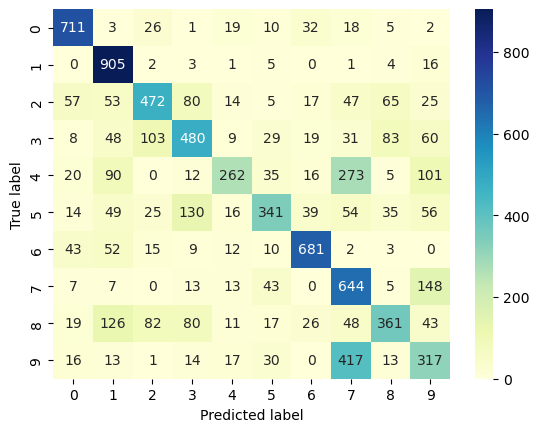


 Accuracy of this Model is :  0.6159523809523809
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       827
           1       0.67      0.97      0.79       937
           2       0.65      0.57      0.60       835
           3       0.58      0.55      0.57       870
           4       0.70      0.32      0.44       814
           5       0.65      0.45      0.53       759
           6       0.82      0.82      0.82       827
           7       0.42      0.73      0.53       880
           8       0.62      0.44      0.52       813
           9       0.41      0.38      0.39       838

    accuracy                           0.62      8400
   macro avg       0.63      0.61      0.60      8400
weighted avg       0.63      0.62      0.61      8400



In [111]:

classifier = KNeighborsClassifier(n_neighbors=183, metric='euclidean')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#accuracy
accuracy = classifier.score(X_test, y_test)
print("\n Accuracy of this Model is : ", accuracy)

#KNN classification report
print(classification_report(y_test,y_pred))

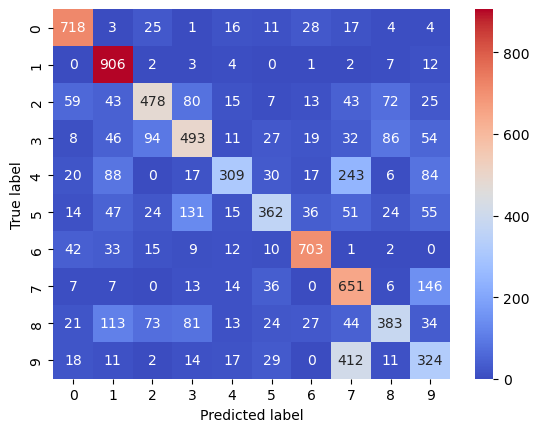


 Accuracy of this Model is :  0.6341666666666667
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       827
           1       0.70      0.97      0.81       937
           2       0.67      0.57      0.62       835
           3       0.59      0.57      0.58       870
           4       0.73      0.38      0.50       814
           5       0.68      0.48      0.56       759
           6       0.83      0.85      0.84       827
           7       0.44      0.74      0.55       880
           8       0.64      0.47      0.54       813
           9       0.44      0.39      0.41       838

    accuracy                           0.63      8400
   macro avg       0.65      0.63      0.62      8400
weighted avg       0.65      0.63      0.63      8400



In [112]:
#model 2:

classifier = KNeighborsClassifier(n_neighbors=101, metric='euclidean')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#accuracy
accuracy = classifier.score(X_test, y_test)
print("\n Accuracy of this Model is : ", accuracy)

#KNN classification report
print(classification_report(y_test,y_pred))

# Neural Network

Epoch 1/20
840/840 [==============================] - 1s 1ms/step - loss: 1.4265 - accuracy: 0.5129 - val_loss: 1.0621 - val_accuracy: 0.6327
Epoch 2/20
840/840 [==============================] - 1s 992us/step - loss: 1.1243 - accuracy: 0.6098 - val_loss: 0.9924 - val_accuracy: 0.6442
Epoch 3/20
840/840 [==============================] - 1s 1ms/step - loss: 1.0574 - accuracy: 0.6342 - val_loss: 0.9497 - val_accuracy: 0.6552
Epoch 4/20
840/840 [==============================] - 1s 984us/step - loss: 1.0247 - accuracy: 0.6426 - val_loss: 0.9269 - val_accuracy: 0.6613
Epoch 5/20
840/840 [==============================] - 1s 1ms/step - loss: 0.9963 - accuracy: 0.6510 - val_loss: 0.9193 - val_accuracy: 0.6714
Epoch 6/20
840/840 [==============================] - 1s 999us/step - loss: 0.9789 - accuracy: 0.6597 - val_loss: 0.9017 - val_accuracy: 0.6734
Epoch 7/20
840/840 [==============================] - 1s 1ms/step - loss: 0.9587 - accuracy: 0.6661 - val_loss: 0.9040 - val_accuracy: 0.6698


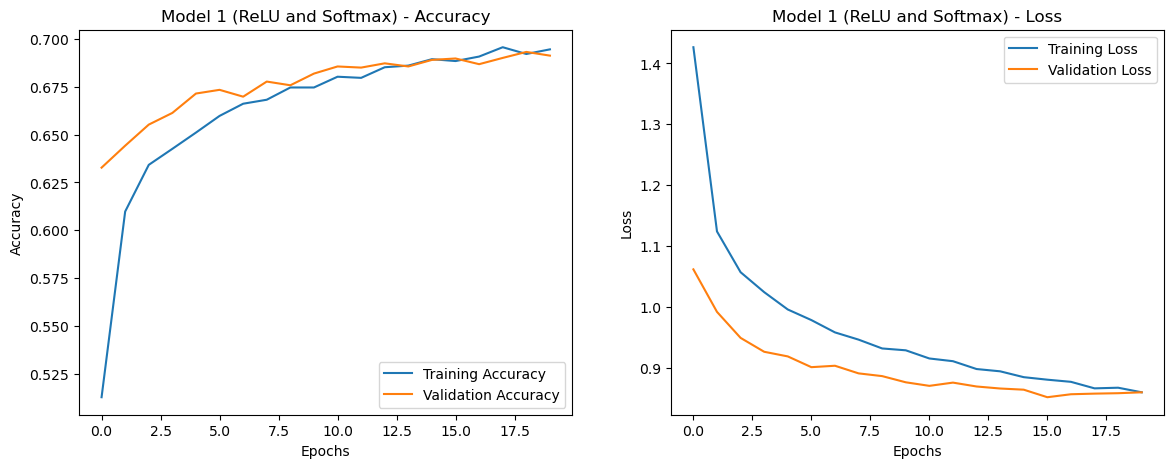

In [117]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming df is your DataFrame and 'label' is the target column
X = df.drop(['label'], axis=1).values  # Feature matrix
y = df['label'].values  # Labels

# Normalize the data
X = X / 255.0

# One-hot encode the labels
y = to_categorical(y, num_classes=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['label'])

# Model 1: ReLU and Softmax
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print(f"Model 1 Test Accuracy: {accuracy1 * 100:.2f}%")

import matplotlib.pyplot as plt

# Visualization function for training history of Model 1
def plot_model1_history(history):
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model 1 (ReLU and Softmax) - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model 1 (ReLU and Softmax) - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.show()

# Plotting training history for Model 1
plot_model1_history(history1)


Epoch 1/20
840/840 [==============================] - 1s 1ms/step - loss: 1.4205 - accuracy: 0.5102 - val_loss: 1.0742 - val_accuracy: 0.6301
Epoch 2/20
840/840 [==============================] - 1s 1ms/step - loss: 1.1250 - accuracy: 0.6123 - val_loss: 0.9818 - val_accuracy: 0.6484
Epoch 3/20
840/840 [==============================] - 1s 1ms/step - loss: 1.0552 - accuracy: 0.6351 - val_loss: 0.9470 - val_accuracy: 0.6609
Epoch 4/20
840/840 [==============================] - 1s 1ms/step - loss: 1.0183 - accuracy: 0.6448 - val_loss: 0.9276 - val_accuracy: 0.6656
Epoch 5/20
840/840 [==============================] - 1s 1ms/step - loss: 0.9946 - accuracy: 0.6539 - val_loss: 0.9128 - val_accuracy: 0.6673
Epoch 6/20
840/840 [==============================] - 1s 1ms/step - loss: 0.9786 - accuracy: 0.6596 - val_loss: 0.9085 - val_accuracy: 0.6713
Epoch 7/20
840/840 [==============================] - 1s 1ms/step - loss: 0.9600 - accuracy: 0.6652 - val_loss: 0.8960 - val_accuracy: 0.6786
Epoch 

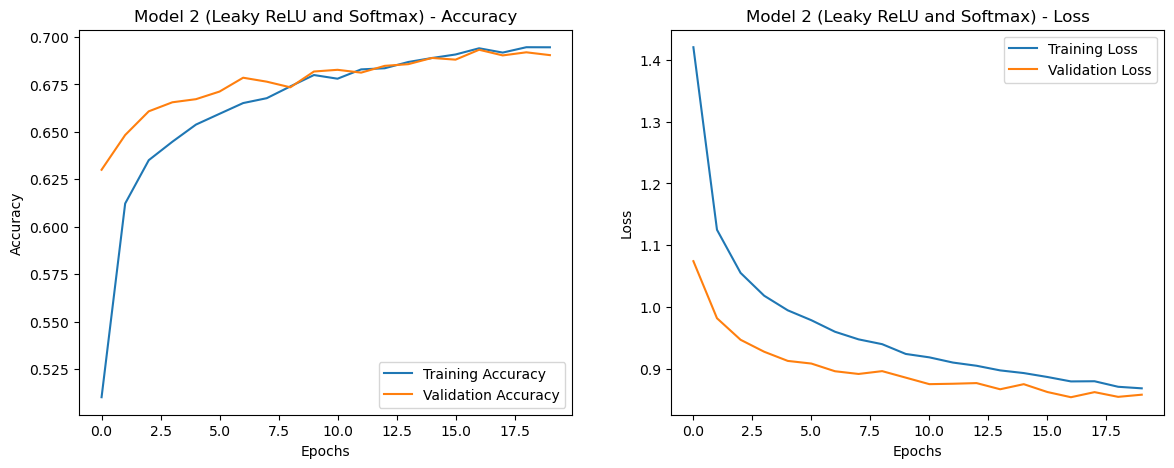

In [118]:
# Model 2: Leaky ReLU and Softmax
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Model 2 Test Accuracy: {accuracy2 * 100:.2f}%")

import matplotlib.pyplot as plt

# Visualization function for training history of Model 2
def plot_model2_history(history):
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model 2 (Leaky ReLU and Softmax) - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model 2 (Leaky ReLU and Softmax) - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.show()

# Plotting training history for Model 2
plot_model2_history(history2)
